# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [ ]:
data=pd.read_csv('../input/imdb-movie-reviews-dataset/movie_data.csv')

In [ ]:
data.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


# Making two copies of Reviews to edit

In [ ]:
# Replacing Positive -> 1 and Negative -> 0

data.replace({"positive":1,"negative":0},inplace=True)

In [ ]:
#Edits After Removing Stopwords
Edited_Review = data['review'].copy()
data['Review_without_stopwords'] = Edited_Review

# Having a look at 1st five reviews in the data

In [ ]:
data.head(5)

,review,sentiment,Review_without_stopwords
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,"In 1974, the teenager Martha Moxley (Maggie Gr..."
1,OK... so... I really like Kris Kristofferson a...,0,OK... so... I really like Kris Kristofferson a...
2,"***SPOILER*** Do not read this, if you think a...",0,"***SPOILER*** Do not read this, if you think a..."
3,hi for all the people who have seen this wonde...,1,hi for all the people who have seen this wonde...
4,"I recently bought the DVD, forgetting just how...",0,"I recently bought the DVD, forgetting just how..."


# Preprocessing The Data

In [ ]:
# Function to preprocess Reviews data
def preprocess_Reviews_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x


# Lemmatization Function

In [ ]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

# Converting all the texts back to sentences

In [ ]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
# Using the preprocessing function to preprocess the hotel data
preprocess_Reviews_data(data,'Review_without_stopwords')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Review_without_stopwords')
# Converting all the texts back to sentences
make_sentences(data,'Review_without_stopwords')

#Edits After Lemmatization
final_Edit = data['Review_without_stopwords'].copy()
data["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the hotel data
Lemmatization(data,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data,'After_lemmatization')

# Results of Preprocessing data (Removing stopwords & Lemmatization)

In [ ]:
data.head(6)

,review,sentiment,Review_without_stopwords,After_lemmatization
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,1974 teenager martha moxley maggie grace moves...,teenager martha moxley maggie grace move high ...
1,OK... so... I really like Kris Kristofferson a...,0,ok soreally like kris kristofferson usual easy...,soreally like kris kristofferson usual easy go...
2,"***SPOILER*** Do not read this, if you think a...",0,spoiler read think watching movie although wou...,spoiler read think watching movie although wou...
3,hi for all the people who have seen this wonde...,1,hi people seen wonderful movie im sure thet wo...,people seen wonderful movie sure thet would li...
4,"I recently bought the DVD, forgetting just how...",0,recently bought dvd forgetting muchhated movie...,recently bought dvd forgetting muchhated movie...
5,Leave it to Braik to put on a good show. Final...,1,leave braik put ongood show finally zorak livi...,leave braik put ongood show finally zorak livi...


So when we are working with sentiwordnet we need to know the characterstic of the word for which we want to know the sentiment . So for finding that position of the word here we are gonna use nltk which tells us about the position of the word which then is used to get the sentiment using the sentiwordnet . We then average out the score for both the positive and the negative score from the whole sentence .
The positions compatible with the sentiwordnet are:
* n - NOUN
* v - VERB
* a - ADJECTIVE
* s - ADJECTIVE SATELLITE
* r - ADVERB

In [ ]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
pos=neg=obj=count=0

postagging = []

for review in data['After_lemmatization']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head)

0       -2.125
1        2.375
2        1.500
3        1.375
4       -0.625
         ...  
49995   -4.500
49996    0.625
49997   -1.000
49998    1.500
49999    0.625
Name: senti_score, Length: 50000, dtype: float64
<bound method NDFrame.head of                                                   review  sentiment  \
0      In 1974, the teenager Martha Moxley (Maggie Gr...          1   
1      OK... so... I really like Kris Kristofferson a...          0   
2      ***SPOILER*** Do not read this, if you think a...          0   
3      hi for all the people who have seen this wonde...          1   
4      I recently bought the DVD, forgetting just how...          0   
...                                                  ...        ...   
49995  OK, lets start with the best. the building. al...          0   
49996  The British 'heritage film' industry is out of...          0   
49997  I don't even know where to begin on this one. ...          0   
49998  Richard Tyler is a little boy who is sc

In [ ]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [ ]:
data.head(10)

,text,label,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
0,It's been about 14 years since Sharon Stone aw...,0,itbeen 14 years since sharon stone awarded vie...,itbeen year since sharon stone awarded viewers...,"[(itbeen, JJ), (year, NN), (since, IN), (sharo...",1.944,Positive
1,someone needed to make a car payment... this i...,0,someone needed makecar payment truly awful mak...,someone needed makecar payment truly awful mak...,"[(someone, NN), (needed, VBD), (makecar, NN), ...",-1.250,Negative
2,The Guidelines state that a comment must conta...,0,guidelines state thatcomment must containminim...,guideline state thatcomment must containminimu...,"[(guideline, NN), (state, NN), (thatcomment, N...",1.500,Positive
3,This movie is a muddled mish-mash of clichés f...,0,movie ismuddled mish mash clichés recent cinem...,movie ismuddled mish mash clichés recent cinem...,"[(movie, NN), (ismuddled, VBD), (mish, JJ), (m...",-4.875,Negative
4,Before Stan Laurel became the smaller half of ...,0,stan laurel became smaller half time greatest ...,stan laurel became smaller half time greatest ...,"[(stan, JJ), (laurel, NN), (became, VBD), (sma...",3.875,Positive
5,This is the best movie I've ever seen! <br /><...,1,best movieve ever seen br br maybe itbecauseli...,best movieve ever seen maybe itbecauselive jus...,"[(best, JJS), (movieve, NN), (ever, RB), (seen...",0.250,Positive
6,The morbid Catholic writer Gerard Reve (Jeroen...,1,morbid catholic writer gerard reve jeroen krab...,morbid catholic writer gerard reve jeroen krab...,"[(morbid, NN), (catholic, JJ), (writer, NN), (...",1.875,Positive
7,"""Semana Santa"" or ""Angel Of Death"" is a very w...",0,semana santa angel death isvery weak movie mir...,semana santa angel death isvery weak movie mir...,"[(semana, NN), (santa, NN), (angel, VBZ), (dea...",-0.750,Negative
8,Somebody mastered the difficult task of mergin...,1,somebody mastered difficult task merging sport...,somebody mastered difficult task merging sport...,"[(somebody, NN), (mastered, VBD), (difficult, ...",3.375,Positive
9,Why did I waste 1.5 hours of my life watching ...,0,didwaste 1 5 hours life watching film even mad...,didwaste hour life watching film even made ame...,"[(didwaste, NN), (hour, NN), (life, NN), (watc...",1.125,Positive


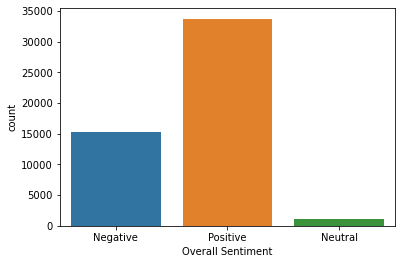

In [ ]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

In [ ]:
data['reviews_text_new'] = data['After_lemmatization'].copy()

# Building a machine learning model

# Bag-of-words

In [ ]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head(3)

,000d,000must,000night,000surly,00m,00schneider,02was,06thsaw,0am,1000on,...,zuthought,zvonimir,zvyagvatsev,zwartboek,zwick,ªsen,álex,ángela,émigré,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vect = CountVectorizer()
vect.fit(data['reviews_text_new'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['reviews_text_new'])
print(simple_train_dtm)

  (0, 1106)	1
  (0, 2588)	1
  (0, 3647)	1
  (0, 4066)	1
  (0, 4142)	1
  (0, 4168)	1
  (0, 4614)	1
  (0, 5463)	1
  (0, 6396)	1
  (0, 6582)	1
  (0, 6952)	4
  (0, 7776)	1
  (0, 9692)	1
  (0, 11859)	1
  (0, 12218)	1
  (0, 12230)	1
  (0, 12825)	1
  (0, 13533)	1
  (0, 14356)	1
  (0, 14636)	1
  (0, 15630)	1
  (0, 15654)	1
  (0, 15898)	1
  (0, 16265)	3
  (0, 17320)	1
  :	:
  (4999, 46844)	1
  (4999, 49261)	1
  (4999, 50379)	1
  (4999, 51029)	1
  (4999, 51888)	1
  (4999, 52235)	1
  (4999, 52798)	1
  (4999, 53329)	1
  (4999, 53389)	1
  (4999, 54860)	1
  (4999, 56474)	1
  (4999, 57725)	1
  (4999, 58166)	1
  (4999, 58795)	1
  (4999, 58858)	1
  (4999, 61963)	1
  (4999, 62069)	1
  (4999, 63242)	1
  (4999, 65801)	1
  (4999, 66033)	1
  (4999, 66094)	1
  (4999, 70410)	1
  (4999, 71498)	1
  (4999, 71556)	1
  (4999, 72562)	1


In [ ]:
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['reviews_text_new'])

# Divide into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

# Applying logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction


## Calculate key performance metrics

from sklearn.metrics import classification_report
# Print a classification report
print(classification_report(y_test_bow,test_pred_lr_all))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77      2955
     Neutral       0.75      0.01      0.03       213
    Positive       0.87      0.94      0.91      6832

    accuracy                           0.86     10000
   macro avg       0.81      0.56      0.57     10000
weighted avg       0.85      0.86      0.85     10000



# TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
noise_words = []
### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(data['reviews_text_new'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            data['Overall Sentiment'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Calculate key performance metrics


# Print a classification report
print(classification_report(y_test_tfidf,test_pred_lr_all))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.84      0.67      0.75      2955
     Neutral       0.00      0.00      0.00       213
    Positive       0.85      0.95      0.90      6832

    accuracy                           0.85     10000
   macro avg       0.56      0.54      0.55     10000
weighted avg       0.83      0.85      0.84     10000

